# Calibration frames


### How to deal with outliers: median v.s. mean, sigma-clipping
Example: combining bias frames


Further familiar with operations on numpy arrays

data io

https://www.astropy.org/ccd-reduction-and-photometry-guide/v/dev/notebooks/01-01-astronomical-CCD-image-components.html

In [15]:
# Let's start with importing our packages
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

# We can beautify our plots by changing the matpltlib setting a little
plt.rcParams['font.size'] = 18
matplotlib.rcParams['figure.figsize'] = (8, 6)
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['font.family'] = "serif"

In [34]:
from astropy.io import fits
import os
from kuaizi.display import display_single

In [262]:
path = '/Users/jiaxuanl/Dropbox (Princeton)/Data/IFU-M/Mar22/'
os.chdir(path)

In [263]:
biases = np.array([fits.open(f'./b0{ind}c1.fits')[0].data for ind in range(854, 904)])

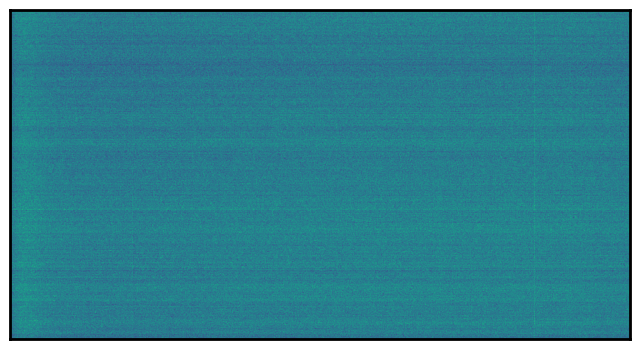

In [264]:
med_bias = np.median(biases, axis=0)
display_single(med_bias, scale_bar=False);

In [126]:
biases = np.array([fits.open(f'./b0{ind}c3.fits')[0].data.astype(float) for ind in range(854, 954)])

In [127]:
med_bias = np.median(biases, axis=0)

(array([0.07918839, 0.09270868, 0.11524701, 0.11717704, 0.13348542,
        0.11965244, 0.09276024, 0.08258593, 0.07653809, 0.09065677]),
 array([880., 881., 882., 883., 884., 885., 886., 887., 888., 889., 890.]),
 [<matplotlib.patches.Polygon at 0x7fd658dd04f0>])

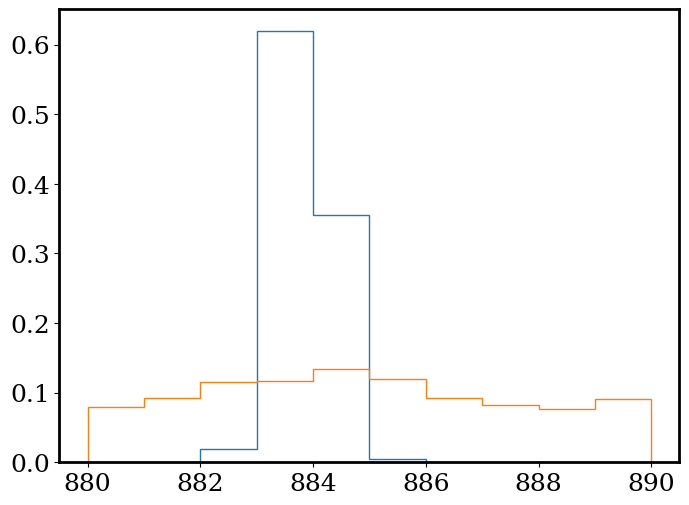

In [121]:
plt.hist(med_bias.flatten(), range=(880, 890), density=True, histtype='step')
plt.hist(biases[1].flatten(), range=(880, 890), density=True, histtype='step')

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00690926, 0.00921234, 0.05066789, 0.07600184,
        0.1658222 , 0.27176416, 0.36388761, 0.58728696, 0.68631967,
        0.69322893, 0.65177338, 0.52970981, 0.34776601, 0.25103639,
        0.15891294, 0.08060801, 0.04836481, 0.00921234, 0.00460617,
        0.00690926, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([880. , 880.2, 880.4, 880.6, 880.8, 881. , 881.2, 881.4, 881.6,
        881.8, 882. , 882.2, 882.4, 882.6, 882.8, 883. , 883.2, 883.4,
        883.6, 883.8, 884. , 884.2, 884.4, 884.6, 884.8, 885. , 885.2,
        885.4, 885.6, 885.8, 886. , 886.2, 886.4, 886.6, 886.8, 887. ,
        887.2, 887.4, 887.6, 887.8

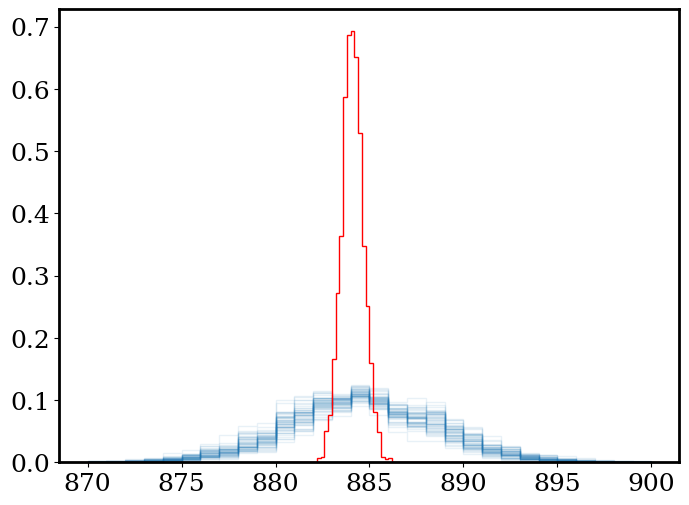

In [113]:
for z in range(50):
    plt.hist(biases[z][1001, :], range=(870, 900), bins=30, density=True, histtype='step', color='C0', alpha=0.1)
    
plt.hist(np.mean(biases[:50, 1001, :], axis=0), 
         range=(880, 890), density=True, bins=50, histtype='step', color='r')

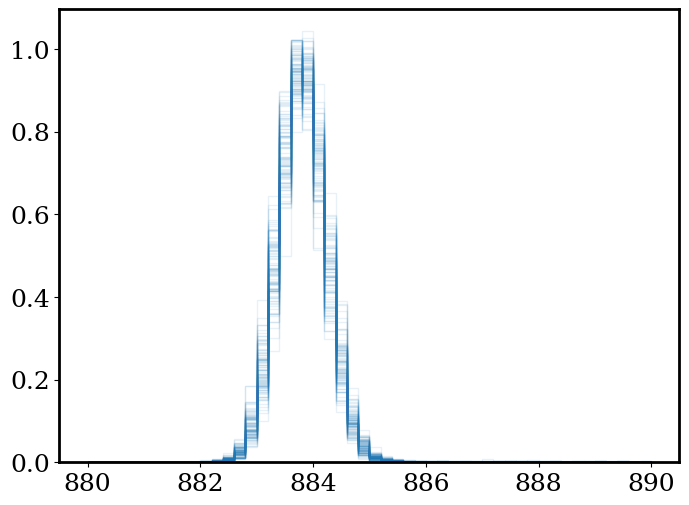

In [124]:
for z in range(100):
    plt.hist(med_bias[30+z, :], range=(880, 890), density=True, bins=50, histtype='step', color='C0', alpha=0.1)
    
# plt.hist(np.mean(biases[:50, 1001, :], axis=0), 
#          range=(880, 890), density=True, bins=50, histtype='step', color='r')

In [104]:
biases[0, 1001, :]

array([885., 879., 886., ..., 890., 885., 885.])

In [105]:
biases[1, 1001, :]

array([884., 885., 881., ..., 880., 884., 888.])

In [109]:
np.mean(biases[:50, 1001, :], axis=0)

array([886.04, 885.42, 884.88, ..., 885.3 , 884.02, 884.58])

In [ ]:
np.mean(biases[:50, 1001, :], axis=0)

(array([0.06232763, 0.08383894, 0.09817981, 0.11693326, 0.12741313,
        0.12630998, 0.09376724, 0.08880309, 0.09376724, 0.10865968]),
 array([880., 881., 882., 883., 884., 885., 886., 887., 888., 889., 890.]),
 [<matplotlib.patches.Polygon at 0x7fd65e4baac0>])

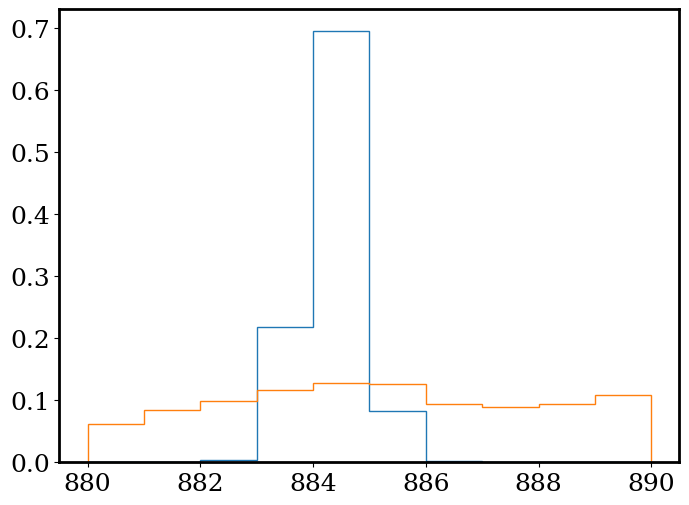

In [85]:
plt.hist(med_bias[1001, :], range=(880, 890), density=True, histtype='step')
plt.hist(biases[0][1001, :], range=(880, 890), density=True, histtype='step')

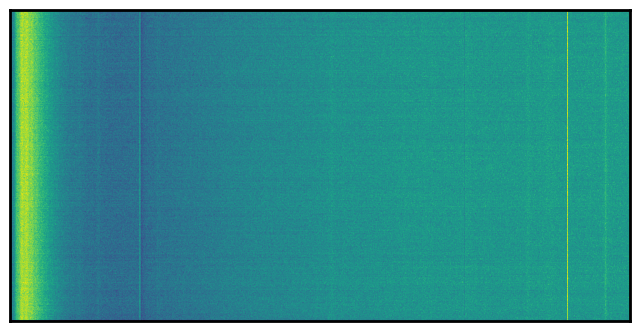

In [285]:
display_single(master_bias, scale_bar=False);

In [288]:
stds = np.std(biases, axis=0)

(array([3.00000e+00, 1.90000e+01, 9.80000e+01, 4.76000e+02, 1.67600e+03,
        5.34000e+03, 1.42750e+04, 3.27760e+04, 6.39940e+04, 1.10213e+05,
        1.71044e+05, 2.30816e+05, 2.84336e+05, 3.09153e+05, 3.09408e+05,
        2.79246e+05, 2.30395e+05, 1.72589e+05, 1.20858e+05, 7.73560e+04,
        4.57320e+04, 2.49560e+04, 1.26960e+04, 5.88700e+03, 2.67200e+03,
        1.12400e+03, 4.65000e+02, 2.36000e+02, 1.75000e+02, 2.19000e+02]),
 array([2.        , 2.13333333, 2.26666667, 2.4       , 2.53333333,
        2.66666667, 2.8       , 2.93333333, 3.06666667, 3.2       ,
        3.33333333, 3.46666667, 3.6       , 3.73333333, 3.86666667,
        4.        , 4.13333333, 4.26666667, 4.4       , 4.53333333,
        4.66666667, 4.8       , 4.93333333, 5.06666667, 5.2       ,
        5.33333333, 5.46666667, 5.6       , 5.73333333, 5.86666667,
        6.        ]),
 <BarContainer object of 30 artists>)

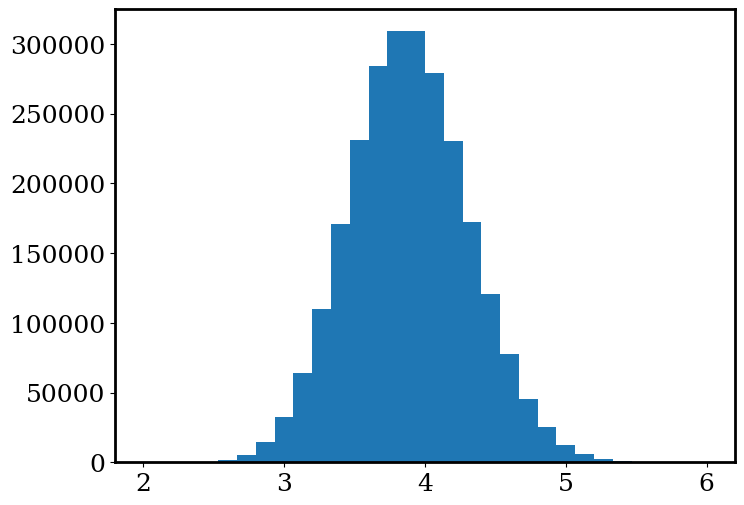

In [294]:
plt.hist(stds.flatten(), range=(2, 6), bins=30)

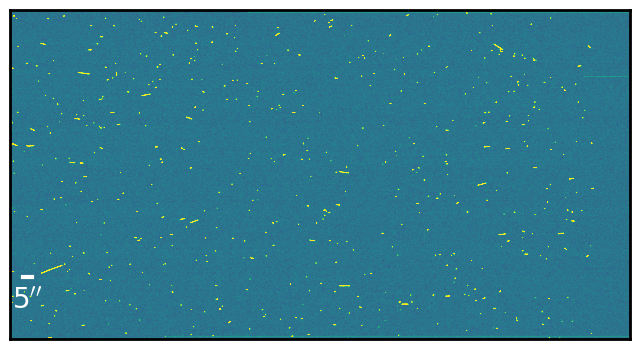

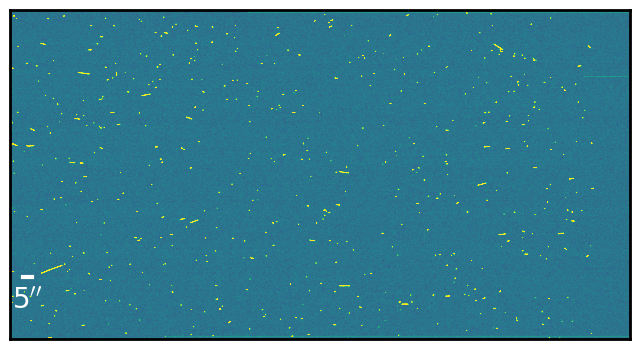

In [290]:
display_single(stds, )

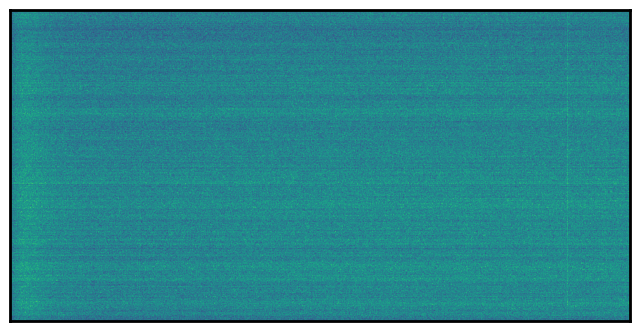

In [284]:
display_single(med_bias, scale_bar=False);

In [323]:
path = '/Users/jiaxuanl/Dropbox (Princeton)/Data/IFU-M/'
os.chdir(path)

sci = fits.open(f'./Mar22/b1190c1.fits')[0].data
twi = fits.open(f'./Mar22/b1204c1.fits')[0].data
bias = fits.open(f'./Mar22/b0855c1.fits')[0].data
bias = bias - np.median(bias[:, 2048:], axis=1)[:,None] # overscan
bias = bias[:1028, :2048]
# bias = bias - np.mean(bias[1028:1155, 2048:]) # overscan
# bias = bias[:1028, :2048]
# master_bias = fits.open('./bbiasc1.fits')[0].data

In [318]:
# display_single((bias - np.median(bias[1028:, :], axis=0)[None, :]));

In [ ]:
biases = np.array([fits.open(f'./b0{ind}c3.fits')[0].data.astype(float) for ind in range(854, 954)])

In [332]:
biases = []
for ind in range(854, 884):
    bias = fits.open(f'./Mar22/b0{ind}c3.fits')[0].data
    bias = bias - np.median(bias[:, 2048:], axis=1)[:,None] # overscan
#     bias = bias - np.median(bias[1028:, :], axis=0)[None,:] # overscan
    bias = bias[:1028, :2048]
    biases.append(bias)
biases = np.array(biases).astype(np.float32)

In [333]:
biases.shape

(30, 1028, 2048)

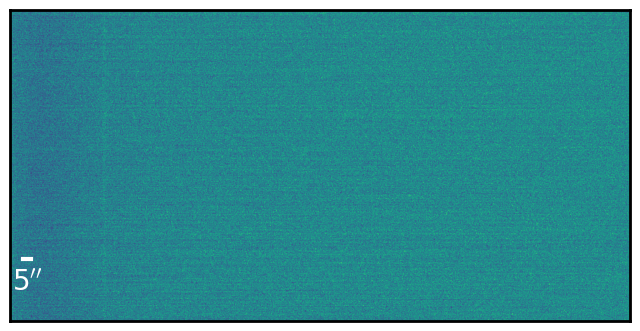

In [334]:
display_single(np.median(biases, axis=0));

In [335]:
from astropy.stats import sigma_clip

In [342]:
filtered_data = sigma_clip(biases, sigma=3, maxiters=5,
                           cenfunc='median', stdfunc='std', 
                           axis=0,
                           masked=False)

In [348]:
med_bias = np.nanmean(filtered_data, axis=0)

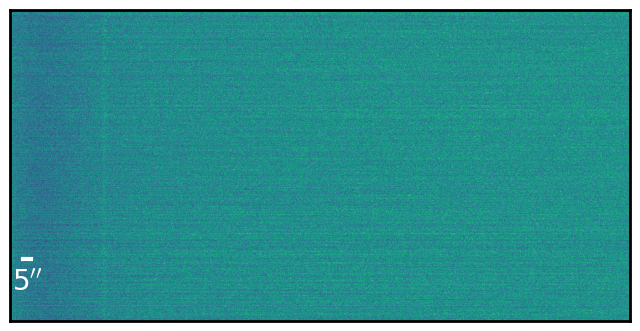

In [351]:
display_single(med_bias);

In [340]:
filtered_data.shape

(30, 1028, 2048)

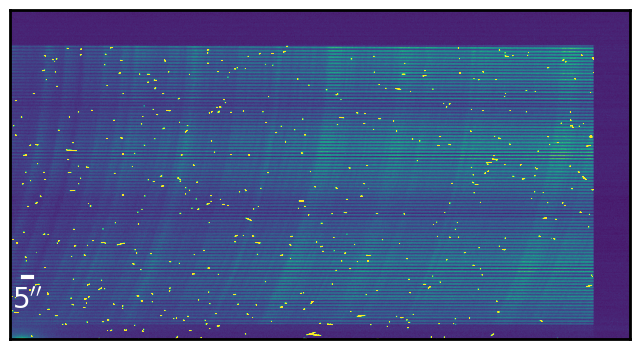

In [303]:
display_single(sci);

In [280]:
med_bias = np.median((biases - np.mean(biases[:, 1028:1155, 2048:], axis=(1, 2))[:, None, None]), axis=0)

In [281]:
med_bias = med_bias[:1028, :2048]

In [207]:
bias.shape

(1156, 2176)

(800.0, 900.0)

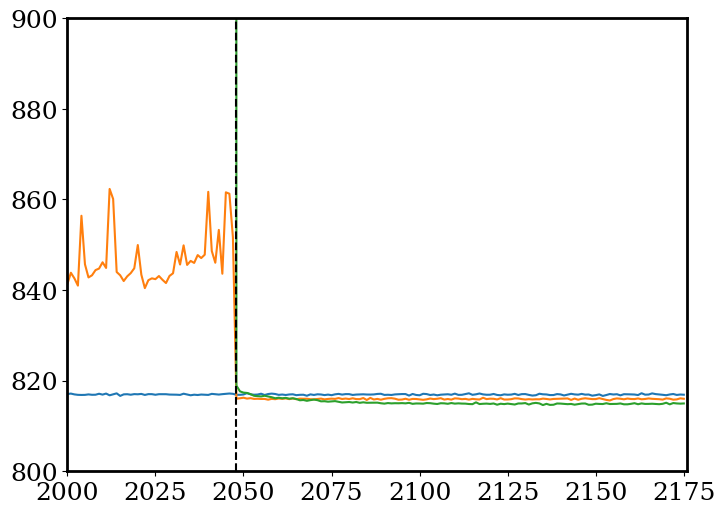

In [212]:
plt.plot(np.mean(bias[:2047, :], axis=0))
plt.plot(np.mean(sci[:2047, :], axis=0))
plt.plot(np.mean(twi[:2047, :], axis=0))
plt.xlim(2000, 2176)

plt.axvline(2048, color='k', ls='--')
plt.ylim(800, 900)

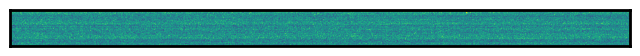

In [236]:
display_single(bias[1028:1155, :], scale_bar=False);

In [225]:
np.std(bias[:, 500:600])

3.964860680805017

In [226]:
2.7 / 0.68

3.9705882352941178

In [239]:
bias.shape

(1156, 2176)

(array([      0.,       0.,       0.,       0., 1363518.,  741826.,
              0.,       0.,       0.,       0.]),
 array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.]),
 [<matplotlib.patches.Polygon at 0x7fd658b15580>])

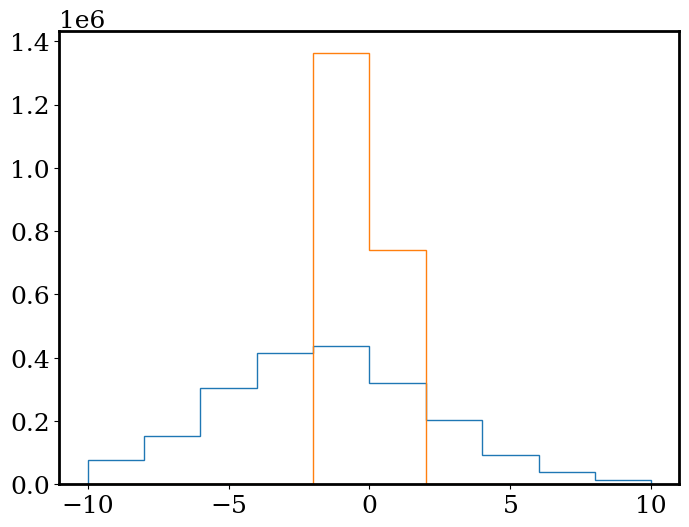

In [253]:
plt.hist(bias.flatten(), range=(-10, 10), histtype='step')
plt.hist(master_bias.flatten(), range=(-10, 10), histtype='step')

In [255]:
np.std(bias - master_bias)

11.22369262482501

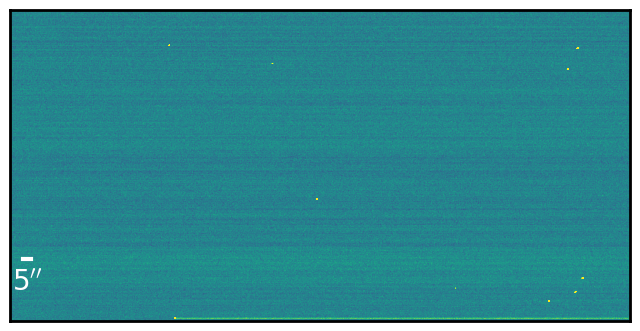

In [261]:
display_single(bias);

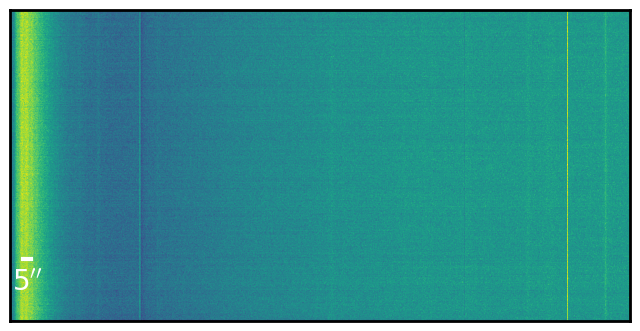

In [244]:
display_single(master_bias);

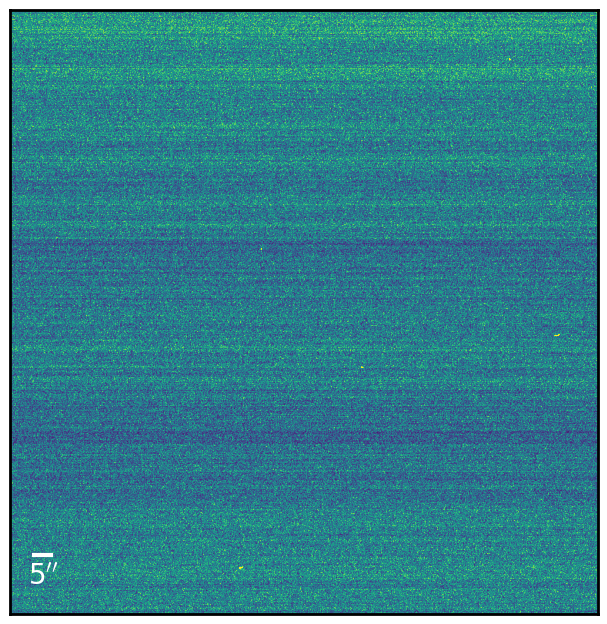

In [242]:
display_single(bias[:, 500:1500]); # [:1028, :2048]

In [ ]:
bias

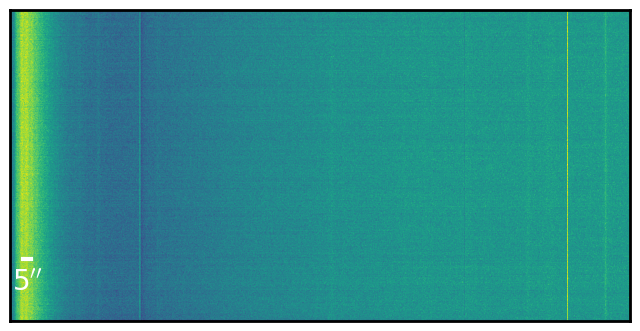

In [155]:
display_single(fits.open('./bbiasc1.fits')[0].data);

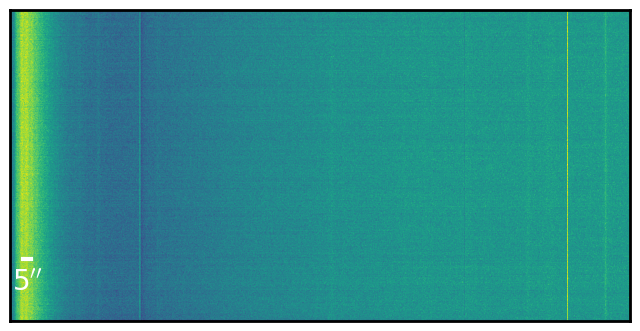

In [160]:
display_single(fits.open('./IFUM_IRAF_0/ifum/TEST_Data/Biases/bbiasc1.fits')[0].data);